In [11]:
import networkx as nx
import pandas as pd
import seaborn as sns
import numpy as np 
cmap = sns.cm.rocket_r
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G = nx.read_gpickle("SP_multiGraph.gpickle")

In [3]:
from collections import defaultdict
people = {}

for i,person in enumerate(G.nodes()):
    people[i] = defaultdict(int)
    people[i]['age'] = G.nodes[person]['age']
    for n in G[person]:
        people[i][G.nodes[n]['age']] += 1


In [4]:
bins = list(range(0,105,5))
labels = list(range(0,100,5))

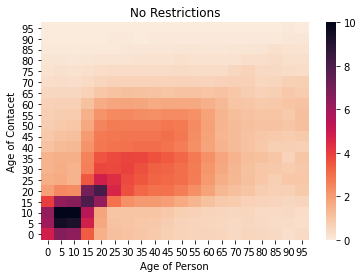

In [18]:
df = pd.DataFrame.from_dict(people).T.fillna(0)
df = df.sort_values(by='age').reset_index(drop=True)
df['age'] = pd.cut(df.age, bins=bins, labels=labels)
df = df.set_index(df.age).drop('age', axis=1)
df.columns = pd.cut(df.columns.to_list(), bins=bins, labels=labels)
df = df.groupby(df.columns, axis=1).sum()
df = df.groupby('age').mean()
sns.heatmap(df.reindex(sorted(df.columns, reverse=True), axis=1).T, annot=False, vmin=0, vmax=10, cmap=cmap)
plt.title('No Restrictions')
plt.ylabel('Age of Contacet')
plt.xlabel('Age of Person')
plt.savefig('heatmapt_relations_age.png', dpi=300)

In [6]:
people_no_schools = {}

for i,person in enumerate(G.nodes()):
    people_no_schools[i] = defaultdict(int)
    people_no_schools[i]['age'] = G.nodes[person]['age']
    for x,y,values in G.edges(person, data=True):
        if values['edge_type'] != 'school':
            people_no_schools[i][G.nodes[y]['age']] += 1

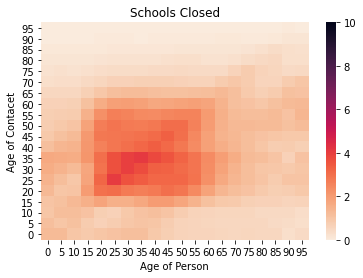

In [15]:
df_nsc = pd.DataFrame.from_dict(people_no_schools).T.fillna(0)
df_nsc = df_nsc.sort_values(by='age').reset_index(drop=True)
df_nsc['age'] = pd.cut(df_nsc.age, bins=bins, labels=labels)
df_nsc = df_nsc.set_index(df_nsc.age).drop('age', axis=1)
df_nsc.columns = pd.cut(df_nsc.columns.to_list(), bins=bins, labels=labels)
df_nsc = df_nsc.groupby(df_nsc.columns, axis=1).sum()
df_nsc = df_nsc.groupby('age').mean()
sns.heatmap(df_nsc.reindex(sorted(df_nsc.columns, reverse=True), axis=1).T, annot=False, vmin=0, vmax=10,  cmap=cmap)
plt.title('Schools Closed')
plt.ylabel('Age of Contacet')
plt.xlabel('Age of Person')
plt.savefig('heatmapt_relations_age_no_schools.png', dpi=300)

In [8]:
people_no_schools_no_work = {}

for i,person in enumerate(G.nodes()):
    people_no_schools_no_work[i] = defaultdict(int)
    people_no_schools_no_work[i]['age'] = G.nodes[person]['age']
    for x,y,values in G.edges(person, data=True):
        if values['edge_type'] != 'school' and values['edge_type'] != 'work':
            people_no_schools_no_work[i][G.nodes[y]['age']] += 1

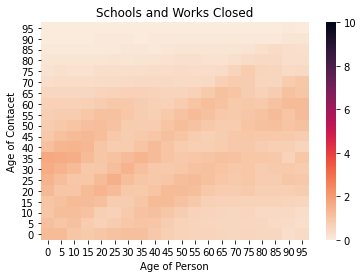

In [16]:
df_nsw = pd.DataFrame.from_dict(people_no_schools_no_work).T.fillna(0)
df_nsw = df_nsw.sort_values(by='age').reset_index(drop=True)
df_nsw['age'] = pd.cut(df_nsw.age, bins=bins, labels=labels)
df_nsw = df_nsw.set_index(df_nsw.age).drop('age', axis=1)
df_nsw.columns = pd.cut(df_nsw.columns.to_list(), bins=bins, labels=labels)
df_nsw = df_nsw.groupby(df_nsw.columns, axis=1).sum()
df_nsw = df_nsw.groupby('age').mean()
sns.heatmap(df_nsw.reindex(sorted(df_nsw.columns, reverse=True), axis=1).T, annot=False, vmin=0, vmax=10,  cmap=cmap)
plt.title('Schools and Works Closed')
plt.ylabel('Age of Contacet')
plt.xlabel('Age of Person')
plt.savefig('heatmapt_relations_age_no_schools_and_work.png', dpi=300)